In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import ipywidgets as widgets
import sys
import matplotlib.colors as colors
import matplotlib.cm as cmx
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist,squareform
sys.path.append("/Users/ash/utilities")
import utilities as ut

# Alignment interaction

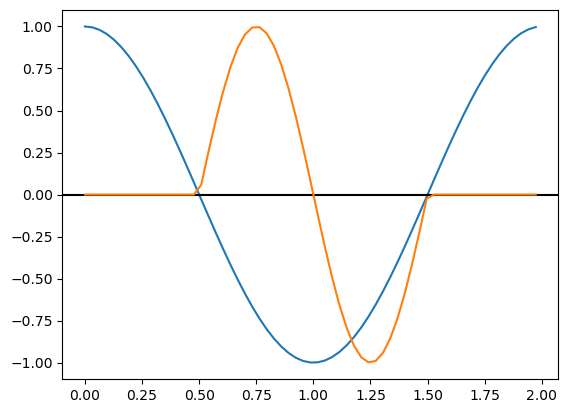

In [513]:
phi1 = 0
phi2 = np.arange(0,np.pi*2,0.1)
def dot(p1,p2): return np.cos(p1)*np.cos(p2)+np.sin(p1)*np.sin(p2)
result = dot(phi1,phi2)
plt.plot(phi2/np.pi,result)
plt.axhline(y=0,c='k')
align = np.sin((phi1-phi2)*2)
align[result>0] = 0
plt.plot(phi2/np.pi,align)

In [526]:
potential = "wca"
rcon = 7.051282051282051
width = 0.2564102564102564
v = 0.06
phi = 1.2
f = 100.0
al = 0.0
al_r = 0.0
eps = 3.0
rc = 1.05
kap = 1000.0
color_ang = 1
indir = "./out/wca"
fname = "{}/v{}phi{}f{}al{}alr{}kap{}.pickle".format(indir,v,phi,f,al,al_r,kap)
if potential=="att":
    indir = "./out/att"
    fname = "{}/v{}phi{}f{}al{}alr{}weps{}rc{}kap{}.pickle".format(indir,v,phi,f,al,al_r,eps,rc,kap)
with open(fname,'rb') as handle:
    data = pickle.load(handle)
r = data['r']
phi = data['phi']

segmented_cmap = ut.make_segmented_cmap()

def animate(t,r,phi):
    x = r[t,:,0]
    y = r[t,:,1]
    ut.circles(x,y,0.5,color='grey')
    if color_ang:
        _phi = phi[t,:]
        theta = np.arctan2(y,x)
        dot = np.cos(_phi)*np.cos(theta)+np.sin(_phi)*np.sin(theta)
        cNorm = colors.Normalize(vmin=-1,vmax=1)
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='RdBu')
        c = np.array([scalarMap.to_rgba(p) for p in dot])
        ut.circles(x,y,0.5,color=c)
        cb = plt.colorbar(scalarMap)
        # cb.ax.set_title(r'$\varphi$')
    ut.circles(0,0,rcon,'k',fc='None')
    ut.circles(0,0,rcon+width,'k',fc='None')
    plt.axis([-12,12,-12,12])
    plt.gca().set_aspect(1)
widgets.interact(animate, t=(0,len(r)-1,1), r=widgets.fixed(r), phi=widgets.fixed(phi))

interactive(children=(IntSlider(value=249, description='t', max=499), Output()), _dom_classes=('widget-interac…

<function __main__.animate(t, r, phi)>

## Local density distribution

Text(0, 0.5, '$p(n)$')

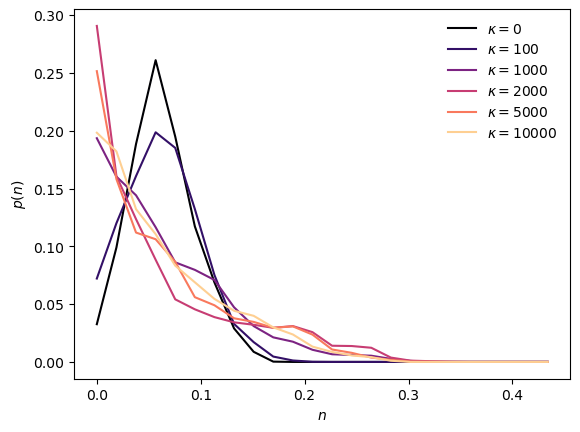

In [10]:
potential = "wca"
rcon = 7.051282051282051
width = 0.2564102564102564
v = 0.06
phi = 1.2
f = 100.0
al = 0.0
al_r = 0.0
eps = 1.0
rc = 1.05
kaps = [0.0,100.0,1000.0,2000.0,5000.0,10000.0]
clrs = plt.cm.magma(np.linspace(0,0.9,len(kaps)))

for i,kap in enumerate(kaps):
    indir = "./out/wca"
    fname = "{}/v{}phi{}f{}al{}alr{}kap{}.pickle".format(indir,v,phi,f,al,al_r,kap)
    if potential=="att":
        indir = "./out/att"
        fname = "{}/v{}phi{}f{}al{}alr{}weps{}rc{}kap{}.pickle".format(indir,v,phi,f,al,al_r,eps,rc,kap)
    with open(fname,'rb') as handle:
        data = pickle.load(handle)
    r = data['r']
    npart = r.shape[1]
    nbins = []
    bin_size = np.pi/8
    for t in range(len(r)):
        x = r[t,:,0]
        y = r[t,:,1]
        theta = np.arctan2(y,x)
        bins = np.arange(-np.pi,np.pi+bin_size,bin_size)
        _npart, _ = np.histogram(theta,bins=bins)
        nbins.extend(_npart)
    hist, bin_edges = np.histogram(nbins,bins=np.arange(0,25,1),density=1)
    plt.plot(bin_edges[:-1]/npart,hist,'-',c=clrs[i],label=r'$\kappa={}$'.format(int(kap)))
plt.legend(frameon=0)
plt.xlabel('$n$')
plt.ylabel('$p(n)$')
# plt.yscale('log')

## Time-series of largest cluster

Text(0.5, 1.0, '$v_0=0.06\\,\\mu m/s,f=100.0$')

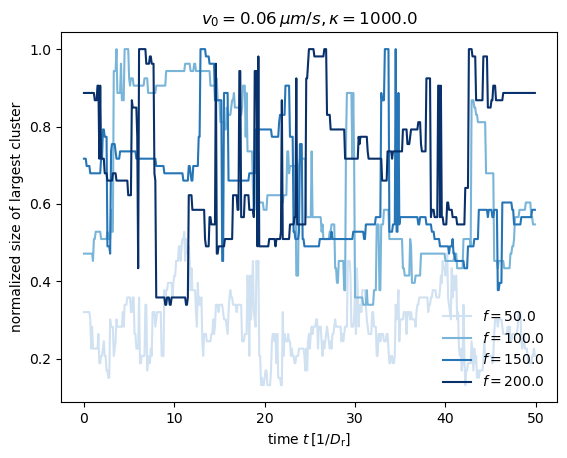

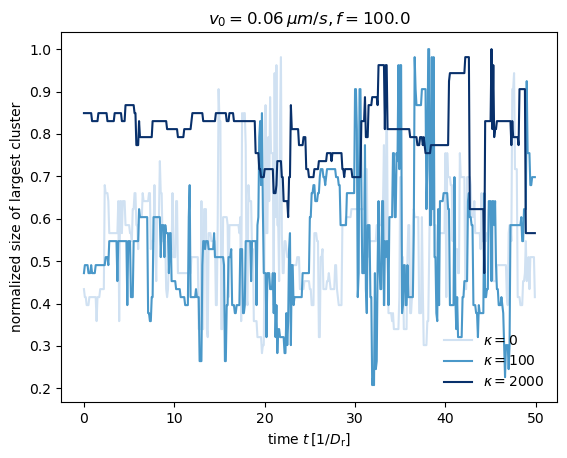

In [511]:
potential = "wca"
cycle = 0.1
v = 0.06
phi = 1.2
f = 100.0
al = 0.0
al_r = 0.0
eps = 3.0
rc = 1.05
kap = 1000.0
fs = [50.0,100.0,150.0,200.0]
clrs = plt.cm.magma(np.linspace(0,0.9,len(kaps)))

def largest_cluster(v,phi,f,kap):
    indir = "./out/wca"
    fname = "{}/v{}phi{}f{}al{}alr{}kap{}.pickle".format(indir,v,phi,f,al,al_r,kap)
    if potential=="att":
        indir = "./out/att"
        fname = "{}/v{}phi{}f{}al{}alr{}weps{}rc{}.pickle".format(indir,v,phi,f,al,al_r,eps,rc)
    with open(fname,'rb') as handle:
        data = pickle.load(handle)
    r = data['r']

    lc = np.zeros(r.shape[0])
    npart = r.shape[1]
    for t in range(r.shape[0]):
        positions = r[t,:]
        db = DBSCAN(eps=1.4,min_samples=1).fit(positions)
        labels = db.labels_
        _, counts = np.unique(labels, return_counts=True)
        lc[t] = np.max(counts)
    return np.array(range(len(lc)))*cycle,lc/npart

# dependence on confining force
clrs = plt.cm.Blues(np.linspace(0.2,1,len(fs)))
for i,f in enumerate(fs):
    time, lc = largest_cluster(v,phi,f,kap)
    plt.plot(time, lc, c=clrs[i], label='$f={}$'.format(f))
plt.xlabel(r'time $t\,[1/D_\mathrm{r}]$')
plt.ylabel(r'normalized size of largest cluster')
plt.legend(frameon=0,loc='lower right')
plt.title(r'$v_0={}\,\mu m/s,\kappa={}$'.format(v,kap))

# dependence on torque strength
plt.figure()
f = 100.0
kaps = [0.0,100.0,1000.0,2000.0,5000.0,10000.0]
kaps = [0.0,100.0,2000.0]
clrs = plt.cm.Blues(np.linspace(0.2,1,len(kaps)))
for i,kap in enumerate(kaps):
    time, lc = largest_cluster(v,phi,f,kap)
    plt.plot(time, lc, c=clrs[i], label=r'$\kappa={}$'.format(int(kap)))
plt.xlabel(r'time $t\,[1/D_\mathrm{r}]$')
plt.ylabel(r'normalized size of largest cluster')
plt.legend(frameon=0,loc='lower right')
plt.xlabel(r'time $t\,[1/D_\mathrm{r}]$')
plt.ylabel(r'normalized size of largest cluster')
plt.legend(frameon=0,loc='lower right')
plt.title(r'$v_0={}\,\mu m/s,f={}$'.format(v,f))


## Cluster-size distribution

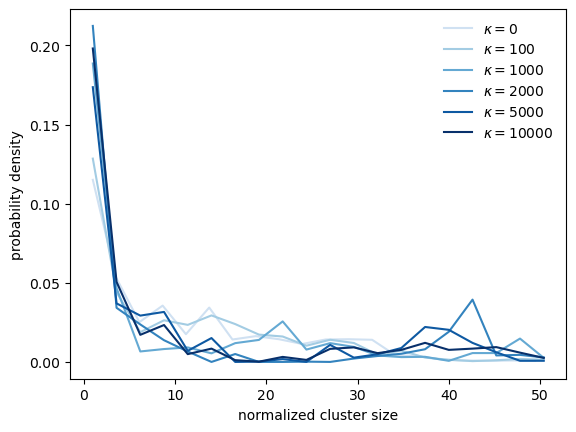

In [11]:
potential = "wca"
v = 0.06
phi = 1.2
f = 100.0
al = 0.0
al_r = 0.0
kaps = [0.0,100.0,1000.0,2000.0,5000.0,10000.0]
clrs = plt.cm.magma(np.linspace(0,0.9,len(kaps)))

def clustersize_dist(v,phi,kap):
    indir = "./out/wca"
    fname = "{}/v{}phi{}f{}al{}alr{}kap{}.pickle".format(indir,v,phi,f,al,al_r,kap)
    if potential=="att":
        indir = "./out/att"
        fname = "{}/v{}phi{}f{}al{}alr{}weps{}rc{}.pickle".format(indir,v,phi,f,al,al_r,eps,rc)
    with open(fname,'rb') as handle:
        data = pickle.load(handle)
    r = data['r']
    npart = r.shape[1]

    sizes = []
    for t in range(r.shape[0]):
        positions = r[t,:]
        db = DBSCAN(eps=1.4,min_samples=1).fit(positions)
        labels = db.labels_
        _, counts = np.unique(labels, return_counts=True)
        sizes.extend(counts)
    hist, bin_edges = np.histogram(sizes,bins=20,density=1)
    return bin_edges[:-1], hist

clrs = plt.cm.Blues(np.linspace(0.2,1,len(kaps)))
for i,kap in enumerate(kaps):
    size, probability = clustersize_dist(v,phi,kap)
    plt.plot(size,probability,c=clrs[i],label=r'$\kappa={}$'.format(int(kap)))
plt.xlabel('normalized cluster size')
plt.ylabel('probability density')
# plt.yscale('log')
plt.legend(frameon=0)


## Span of particles

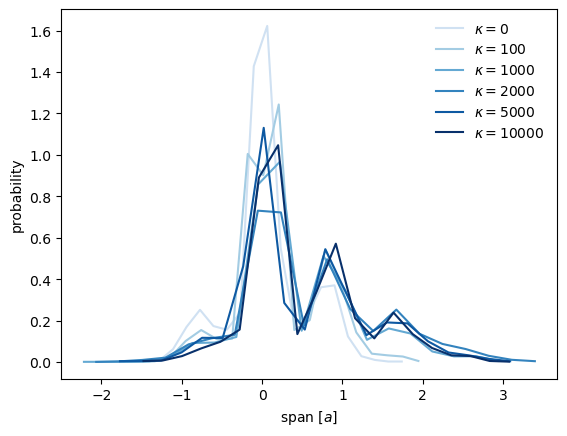

In [4]:
potential = "wca"
phi = 1.2
v = 0.06
kap = 100.0
rcon = 7.051282051282051
width = 0.2564102564102564
r0 = rcon + 0.5*width
kaps = [0.0,100.0,1000.0,2000.0,5000.0,10000.0]

def span_dist(v,phi,kap):
    indir = "./out/wca"
    fname = "{}/v{}phi{}f{}al{}alr{}kap{}.pickle".format(indir,v,phi,f,al,al_r,kap)
    with open(fname,'rb') as handle:
        data = pickle.load(handle)
    r = data['r']
    npart = r.shape[1]

    spans = []
    for t in range(r.shape[0]):
        positions = r[t,:]
        _spans = np.linalg.norm(positions,axis=1)-r0
        spans.extend(_spans)
        hist, bin_edges = np.histogram(spans,bins=20,density=1)
    return 0.5*(bin_edges[1:]+bin_edges[:-1]), hist

clrs = plt.cm.Blues(np.linspace(0.2,1,len(kaps)))
for i,kap in enumerate(kaps):
    span, probability = span_dist(v,phi,kap)
    plt.plot(span,probability,c=clrs[i],label=r'$\kappa={}$'.format(int(kap)))
plt.xlabel('span $[a]$')
plt.ylabel('probability')
plt.legend(frameon=0)

## Angular span of largest cluster

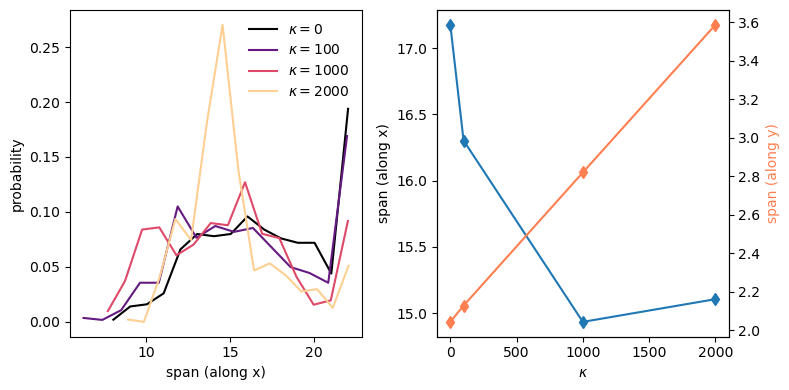

In [39]:
phi = 1.2
v = 0.06
kap = 10000.0
f = 100.0
al = 0.0
al_r = 0.0
rcon = 7.051282051282051
width = 0.2564102564102564

def span(v,phi,kap):
    indir = "./out/wca"
    fname = "{}/v{}phi{}f{}al{}alr{}kap{}.pickle".format(indir,v,phi,f,al,al_r,kap)
    with open(fname,'rb') as handle:
        data = pickle.load(handle)
    r = data['r']
    xspan = []
    yspan = []
    for t in range(r.shape[0]):
        positions = r[t,:]
        Lx = 2*np.pi*(rcon+0.5*width)
        R = np.linalg.norm((positions[:,0],positions[:,1]),axis=0)
        theta = np.arctan2(positions[:,1],positions[:,0]) + np.pi
        x = theta*Lx/(2*np.pi)
        y = R-(rcon+0.5*width)
        X = np.column_stack((x,y))
        db = ut.clustering_pbc(X,[Lx,1000],1.4)
        # get span of the largest cluster
        labels = db.labels_
        values, counts = np.unique(labels, return_counts=True)
        largest_label = values[np.argmax(counts)]
        xl = x[labels==largest_label]
        yl = y[labels==largest_label]
        xdist=pdist(xl.reshape(xl.shape[0],1))
        xdist[xdist>(Lx*0.5)]-=Lx
        xspan.append(max(abs(xdist)))
        ydist=max(yl)-min(yl)
        yspan.append(ydist)
        
    return xspan, yspan

kaps = [0.0,100.0,1000.0,2000.0]
clrs = plt.cm.magma(np.linspace(0,0.9,len(kaps)))
fig, axs = plt.subplots(ncols=2,figsize=(8,4))

avg_xs = np.zeros(len(kaps))
avg_ys = np.zeros(len(kaps))
std_xs = np.zeros(len(kaps))
std_ys = np.zeros(len(kaps))
for i,kap in enumerate(kaps):
    xs, ys = span(v,phi,kap)
    avg_xs[i] = np.mean(xs)
    avg_ys[i] = np.mean(ys)
    std_xs[i] = np.std(xs)
    std_ys[i] = np.std(ys)
    hist, bin_edges = np.histogram(xs,bins=15,density=1)
    axs[0].plot(0.5*(bin_edges[1:]+bin_edges[:-1]), hist, c=clrs[i], label=r'$\kappa={}$'.format(int(kap)))
axs[0].set_xlabel('span (along x)')
axs[0].set_ylabel('probability')
axs[0].legend(frameon=0)

ax2 = axs[1].twinx()
axs[1].plot(kaps,avg_xs,'d-',label='along x')
ax2.plot(kaps,avg_ys,'d-',c='coral',label='along y')
axs[1].set_xlabel(r'$\kappa$')
axs[1].set_ylabel('span (along x)')
ax2.set_ylabel('span (along y)',color='coral')
plt.tight_layout()

# Attraction

In [577]:
potential = "wca"
rcon = 7.051282051282051
width = 0.2564102564102564
v = 0.06
phi = 1.2
f = 100.0
al = 0.0
al_r = 0.0
eps = 20.0
rc = 1.05
kap = 0.0
color_ang = 0
indir = "./out/att"
fname = "{}/v{}phi{}f{}al{}alr{}weps{}rc{}kap{}.pickle".format(indir,v,phi,f,al,al_r,eps,rc,kap)
with open(fname,'rb') as handle:
    data = pickle.load(handle)
r = data['r']
phi = data['phi']

segmented_cmap = ut.make_segmented_cmap()

def animate(t,r,phi):
    x = r[t,:,0]
    y = r[t,:,1]
    ut.circles(x,y,0.5,color='grey',ec='None')
    if color_ang:
        _phi = phi[t,:]
        theta = np.arctan2(y,x)
        e_dot_er = np.cos(_phi)*np.cos(theta)+np.sin(_phi)*np.sin(theta)
        cNorm = colors.Normalize(vmin=-1,vmax=1)
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='RdBu')
        c = np.array([scalarMap.to_rgba(p) for p in e_dot_er])
        ut.circles(x,y,0.5,color=c,ec='None')
        cb = plt.colorbar(scalarMap)
        cb.ax.set_title(r'$\vec{e}\cdot\vec{e}_r$')
    ut.circles(0,0,rcon,'k',fc='None')
    ut.circles(0,0,rcon+width,'k',fc='None')
    plt.axis([-12,12,-12,12])
    plt.gca().set_aspect(1)
widgets.interact(animate, t=widgets.Play(min=0,max=len(r)-1), r=widgets.fixed(r), phi=widgets.fixed(phi))

interactive(children=(Play(value=0, description='t', max=499), Output()), _dom_classes=('widget-interact',))

<function __main__.animate(t, r, phi)>

## Local density distribution

Text(0, 0.5, '$p(n)$')

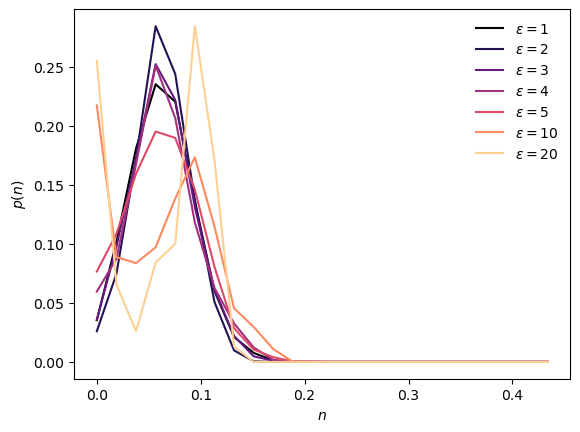

In [8]:
potential = "att"
v = 0.06
phi = 1.2
f = 100.0
al = 0.0
al_r = 0.0
rc = 1.05
kap = 0.0
epss = [1.0,2.0,3.0,4.0,5.0,10.0,20.0]
clrs = plt.cm.magma(np.linspace(0,0.9,len(epss)))

for i,eps in enumerate(epss):
    indir = "./out/att"
    fname = "{}/v{}phi{}f{}al{}alr{}weps{}rc{}kap{}.pickle".format(indir,v,phi,f,al,al_r,eps,rc,kap)
    with open(fname,'rb') as handle:
        data = pickle.load(handle)
    r = data['r']
    npart = r.shape[1]
    nbins = []
    bin_size = np.pi/8
    for t in range(len(r)):
        x = r[t,:,0]
        y = r[t,:,1]
        theta = np.arctan2(y,x)
        bins = np.arange(-np.pi,np.pi+bin_size,bin_size)
        _npart, _ = np.histogram(theta,bins=bins)
        nbins.extend(_npart)
    hist, bin_edges = np.histogram(nbins,bins=np.arange(0,25,1),density=1)
    plt.plot(bin_edges[:-1]/npart,hist,'-',c=clrs[i],label=r'$\epsilon={}$'.format(int(eps)))
plt.legend(frameon=0)
plt.xlabel('$n$')
plt.ylabel('$p(n)$')

## Angular span of clusters

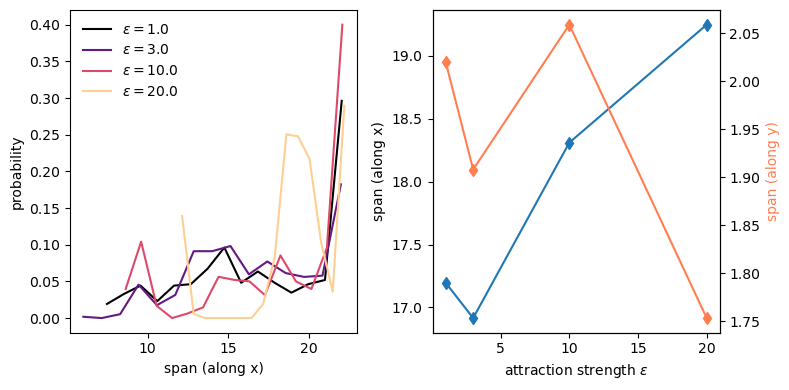

In [43]:
rcon = 7.051282051282051
width = 0.2564102564102564
v = 0.06
phi = 1.2
f = 100.0
al = 0.0
al_r = 0.0
rc = 1.05
kap = 0.0
epss = [1.0,3.0,10.0,20.0]
clrs = plt.cm.magma(np.linspace(0,0.9,len(epss)))

def span(v,phi,eps):
    indir = "./out/att"
    fname = "{}/v{}phi{}f{}al{}alr{}weps{}rc{}kap{}.pickle".format(indir,v,phi,f,al,al_r,eps,rc,kap)
    with open(fname,'rb') as handle:
        data = pickle.load(handle)
    r = data['r']
    xspan = []
    yspan = []
    for t in range(r.shape[0]):
        positions = r[t,:]
        Lx = 2*np.pi*(rcon+0.5*width)
        R = np.linalg.norm((positions[:,0],positions[:,1]),axis=0)
        theta = np.arctan2(positions[:,1],positions[:,0]) + np.pi
        x = theta*Lx/(2*np.pi)
        y = R-(rcon+0.5*width)
        X = np.column_stack((x,y))
        db = ut.clustering_pbc(X,[Lx,1000],1.4)
        # get span of the largest cluster
        labels = db.labels_
        values, counts = np.unique(labels, return_counts=True)
        largest_label = values[np.argmax(counts)]
        xl = x[labels==largest_label]
        yl = y[labels==largest_label]
        xdist=pdist(xl.reshape(xl.shape[0],1))
        xdist[xdist>(Lx*0.5)]-=Lx
        xspan.append(max(abs(xdist)))
        ydist=pdist(yl.reshape(yl.shape[0],1))
        yspan.append(max(abs(ydist)))
        
    return xspan, yspan

fig, axs = plt.subplots(ncols=2,figsize=(8,4))

avg_xs = np.zeros(len(epss))
avg_ys = np.zeros(len(epss))
for i,eps in enumerate(epss):
    xs, ys = span(v,phi,eps)
    avg_xs[i] = np.mean(xs)
    avg_ys[i] = np.mean(ys)
    hist, bin_edges = np.histogram(xs,bins=15,density=1)
    axs[0].plot(0.5*(bin_edges[1:]+bin_edges[:-1]), hist, c=clrs[i], label=r'$\epsilon={}$'.format(eps))
axs[0].set_xlabel('span (along x)')
axs[0].set_ylabel('probability')
axs[0].legend(frameon=0)

ax2 = axs[1].twinx()
axs[1].plot(epss,avg_xs,'d-',label='along x')
ax2.plot(epss,avg_ys,'d-',c='coral',label='along y')
axs[1].set_xlabel(r'attraction strength $\epsilon$')
axs[1].set_ylabel('span (along x)')
ax2.set_ylabel('span (along y)',color='coral')
plt.tight_layout()